In [1]:
from gpr_mcmc import GaussianProcessMCMCRegressor as GPMR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_absolute_error

rng = np.random.default_rng(42)

In [2]:
df = pd.read_csv('sample_data/data.csv')

y = df["bicycle.theft"].to_numpy()
X = df[['xi', 'yi']].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.33, random_state=42)

### GPR with MCMC (PCN)

In [3]:
gpmr = GPMR(ell=0.2, log_likelihood='poisson', random_state=rng)

In [4]:
gpmr.fit(X_train, y_train)

In [5]:
y_pred = gpmr.predict(X_test, return_train_preds=True)

100%|███████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 11943.56it/s]


In [6]:
gpmr.score(X_test, y_test, method="mae")

100%|████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:01<00:00, 8882.70it/s]


1.5166518280476882

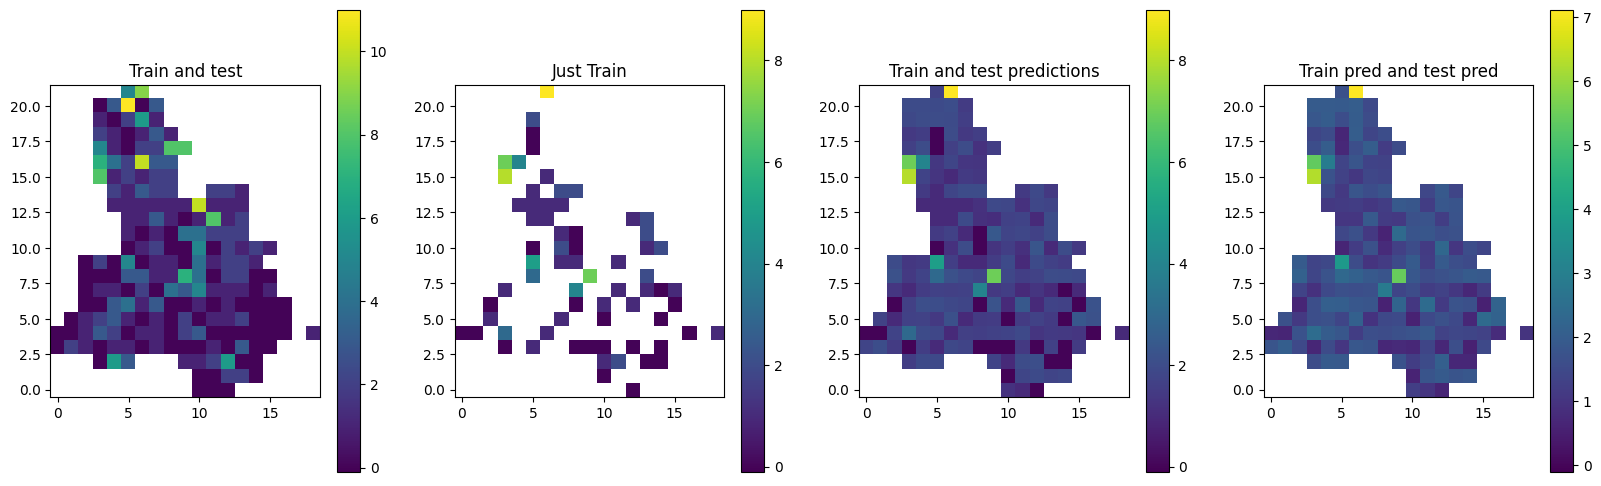

In [7]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 6))

GPMR.plot(X, y, ax=ax1, title="Train and test", pos_only=True)
GPMR.plot(X_train, y_train, ax=ax2, title="Just Train", pos_only=True)
GPMR.plot(np.vstack([X_test, X_train]), np.hstack([y_pred[:len(X_test)], y_train]), ax=ax3, title="Train and test predictions", pos_only=True)
# Proper result for this example:
GPMR.plot(np.vstack([X_test, X_train]), y_pred, ax=ax4, title="Train pred and test pred", pos_only=True) 

### GPR with MCMC (GRW)

In [14]:
gpmr = GPMR(ell=0.2, log_likelihood='poisson', mcmc_method='grw', random_state=rng)

In [15]:
gpmr.fit(X_train, y_train)

In [16]:
y_pred = gpmr.predict(X_test, return_train_preds=True)

100%|████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:04<00:00, 2022.21it/s]


In [17]:
gpmr.score(X_test, y_test, method="mae")

100%|████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1924.10it/s]


1.586216214295675

### GPR with Laplace approximation

### GPR with exact Gaussian likelihood

In [8]:
gpr = GaussianProcessRegressor(kernel=gpmr.kernel_, optimizer=None, random_state=42)

In [9]:
gpr.fit(X_train, y_train);

In [10]:
y_pred = gpr.predict(np.vstack([X_test, X_train]))

In [12]:
mean_absolute_error(y_test, gpr.predict(X_test))

1.7553935922349908

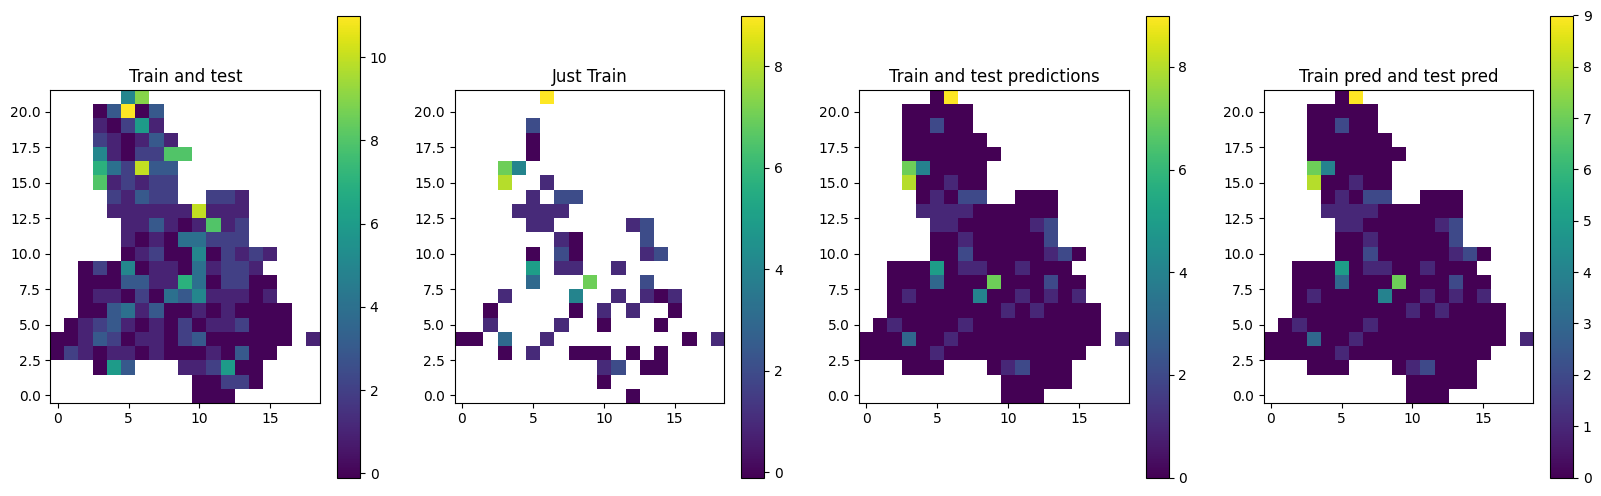

In [13]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 6))

GPMR.plot(X, y, ax=ax1, title="Train and test")
GPMR.plot(X_train, y_train, ax=ax2, title="Just Train")
GPMR.plot(np.vstack([X_test, X_train]), np.hstack([y_pred[:len(X_test)], y_train]), ax=ax3, title="Train and test predictions", pos_only=False)
GPMR.plot(np.vstack([X_test, X_train]), y_pred, ax=ax4, title="Train pred and test pred", pos_only=False) 

## Meuse dataset
[Example](https://rstudio-pubs-static.s3.amazonaws.com/63374_8651f7cd6b2d41a5bba5708d2b40f24e.html), [data source](https://github.com/filipkral/meuse/blob/master/meuse.txt)

### GPR with MCMC (PCN)

### GPR with Laplace approximation

### GPR with exact Gaussian likelihood